# PROJECT 2
 

# CUSTOMER REVIEW PREDICTION SYSTEM

# PROBLEM STATEMENT

Normally, a lot of businesses are remained as failures due to lack of profit, lack of proper improvement measures.
Mostly, restaurant owners face a lot of difficulties to improve their productivity. 
This project really helps those who want to increase their productivity, which in turn increases their business profits.
This is the main objective of this project.

What the project does is that the restaurant owner gets to know about drawbacks of his restaurant 
such as most disliked food items of his restaurant by customer’s text review which is processed with ML
classification algorithm(Naive Bayes)

The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive
or negative. To do so, we will work on Restaurant Review dataset, we will load it into predicitve algorithms 
Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression. In the end,
we hope to find a "best" model for predicting the review's sentiment.

# Importing liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset

In [2]:
df=pd.read_csv('r_data.tsv',delimiter='\t')

In [3]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
1381,clean,1
1382,less,0
1383,clean,1
1384,less,0


In [4]:
df.shape

(1386, 2)

In [5]:
# check null values

In [6]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [7]:
# data balance

In [8]:
df['Liked'].value_counts()

1    792
0    594
Name: Liked, dtype: int64

<AxesSubplot:>

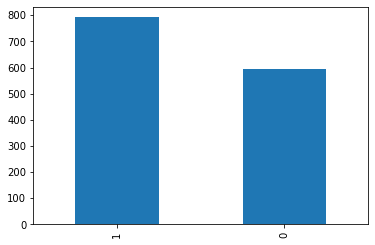

In [9]:
df['Liked'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Liked'>

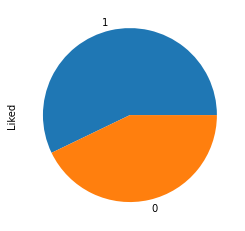

In [10]:
df['Liked'].value_counts().plot(kind='pie')

Preprocessing Dataset
Each review undergoes through a preprocessing step, where all the vague information is removed.

Removing the Stopwords, numeric and speacial charecters.
Normalizing each review using the approach of stemming.

# Natural language processing

In [11]:
import nltk
import re

In [12]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [13]:
nltk.download('stopwords')                # a,an,the,on,at,is

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Clean review

In [14]:
df['Review'][0]

'Wow... Loved this place.'

In [15]:
corpus=[]
for i in range (len(df)):
    # Cleaning special character or numerical values from the reviews
    review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=df['Review'][i])
    
    # Converting the entire review into lower case
    review=review.lower()
    
    # Tokenizing the review by words
    list1=review.split()
    
    # Remove stopwords
    list2=[i for i in list1 if i not in set(stopwords.words('english'))]
    
    # Stemming
    ps=PorterStemmer()
    list3=[ps.stem(i) for i in list2]
    
    # convert list into string
    newstring=' '.join(list2)
    corpus.append(newstring)
    
    

In [16]:
corpus

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great prices',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warmer',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place worth time let alone vegas',
 'like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care less interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food tables restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'also combo

# DATE 26 JULY 2022

# countvectorizer

From the cleaned dataset, potential features are extracted and are converted to numerical format.
The vectorization techniques are used to convert textual data to numerical format. Using vectorization, 
a matrix is created where each column represents a feature and each row represents an individual review.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()
y=df.iloc[:,1].values

In [24]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
X.shape

(1386, 1893)

In [26]:
y

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

# Import pickle

In [27]:
import pickle
f=open('cv.pkl','wb')
pickle.dump(cv,f)                  # stored file name cv.pkl...open home page & check

# Model training

Training and Classification Further the data is splitted into training and testing set using Cross Validation technique. This data is used as input to classification algorithm.
Classification Algorithms:
Algorithms like Decision tree, Support Vector Machine, Logistic Regression, Naive Bayes were implemented and on comparing the evaluation metrics two of the algorithms gave better predictions than others.
Multinomial Naive Bayes Bernoulli Naive Bayes Logistic Regression



# Spliting the dataset into the Training & Testing set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Multinomial NB

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
classifier1=MultinomialNB(alpha=0.1)
classifier1.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [34]:
y_pred=classifier1.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

0.802158273381295

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm=confusion_matrix(y_test,y_pred)
print('confusion_matrix:\n',cm)

confusion_matrix:
 [[ 87  33]
 [ 22 136]]


In [39]:
from sklearn.metrics import classification_report

In [40]:
print('classification_report\n',classification_report(y_test,y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       120
           1       0.80      0.86      0.83       158

    accuracy                           0.80       278
   macro avg       0.80      0.79      0.80       278
weighted avg       0.80      0.80      0.80       278



In [41]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [42]:
precision_score(y_test,y_pred)

0.8047337278106509

In [43]:
recall_score(y_test,y_pred)

0.8607594936708861

In [44]:
import seaborn as sns

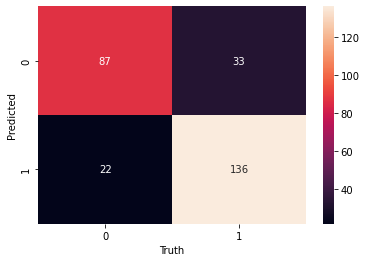

In [46]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

# Converting model into byte stream

In [47]:
import pickle
f=open('newmodel.pkl','wb')
pickle.dump(classifier1,f)           # stored file name-newmodel.pkl

# Bernoulli NB

In [48]:
from sklearn.naive_bayes import BernoulliNB

In [49]:
classifier2=BernoulliNB(alpha=0.8)
classifier2.fit(X_train,y_train)

BernoulliNB(alpha=0.8)

In [50]:
classifier2.score(X_test,y_test)

0.7805755395683454

In [51]:
# Predicting the Test set results
y_pred = classifier2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))



Confusion Matrix:
 [[ 76  44]
 [ 17 141]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.63      0.71       120
           1       0.76      0.89      0.82       158

    accuracy                           0.78       278
   macro avg       0.79      0.76      0.77       278
weighted avg       0.79      0.78      0.78       278



Accuracy is  78.06 %
Precision is  0.76
Recall is  0.89


# logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
classifier3=LogisticRegression()
classifier3.fit(X_train,y_train)

LogisticRegression()

In [54]:
classifier3.score(X_test,y_test)

0.8273381294964028

In [55]:
y_pred = classifier3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[ 99  21]
 [ 27 131]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       120
           1       0.86      0.83      0.85       158

    accuracy                           0.83       278
   macro avg       0.82      0.83      0.83       278
weighted avg       0.83      0.83      0.83       278



Accuracy is  82.73 %
Precision is  0.86
Recall is  0.83


# Review Prediction

In [62]:
a='Good Taste'
t=cv.transform([a])

In [63]:
classifier1.predict(t)

array([1], dtype=int64)

In [64]:
b='Bad Taste'
t=cv.transform([b])

In [65]:
classifier1.predict(t)

array([0], dtype=int64)

In [78]:
a='not good'                 # not word is stopword 
t=cv.transform([a])

In [79]:
res=classifier1.predict(t)

In [80]:
if "not" in a:
    res[0]=abs(res[0]-1)
print(res[0])

0


# Analysis and Conclusion

In this study, an attempt has been made to classify sentiment analysis for restaurant reviews using machine learning techniques. Two algorithms namely Multinomial Naive Bayes and Bernoulli Naive Bayes are implemented.

